In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

from common import *

In [2]:
files = collect_replica_files("data/", "SBST")
results = load_results(files)

In [3]:
for replica in range(len(results)):
    print(f'Replica: {replica}, {os.path.splitext(files[replica])[0]}')

Replica: 0, data/SBST_2022-11-04_094648.193471_0.pickle
Replica: 1, data/SBST_2022-11-03_170852.173450_0.pickle


In [4]:
# Function for visualizing the roads, with the parameters: replica (which replica to visualize the roads for), n_images (the number of images to be created)
# Please use an even number (divisible by 10) for the number of images
def road_visualization(replica, n_images=100):
    
    # Get the objectives from the SUT output
    def get_objectives(results):
        objectives = []
        for objective in results:
            test = np.array(objective.test_repository.get()[2]).flatten()
            objectives.append(test)
        return objectives
    
    _input, _, _output = results[replica].test_repository.get()
    x, y = _input[0].input_denormalized
    objectives = get_objectives(results)

    #filename = input("What do you want to name the file?")
    rows = int(n_images/10)
    
    fig, axes = plt.subplots(rows, 10, figsize=(64, 64), sharex = True, sharey = True)
    plt.xticks([])
    plt.yticks([])
    idx = 0
    failed_cnt = 0
    for row in range(rows):
        for column in range(10):
            x, y = _input[idx].input_denormalized
            axes[row, column].title.set_text(f'[{(idx+1)}] - Robustness: {round(objectives[replica][idx], 3)}')
            
            # Highlight the roads that produced a failed test
            if objectives[replica][idx] <= 0.05:
                axes[row, column].plot(x, y, 'r')
                axes[row, column].scatter(x[::15], y[::15], color='r')
                failed_cnt+=1
            else:
                axes[row, column].plot(x, y, 'b')
                axes[row, column].scatter(x[::15], y[::15], color='b')

            idx+=1
    # Add whatever title that you want, does not necessarily have to be this one.
    fig.suptitle(f'Road visualization of {idx} test runs where {failed_cnt} failed - Seed: {results[replica].seed}', fontsize=40) 
    #plt.savefig(f'road_images/{filename}.png', pad_inches=0.1, dpi=150)
    #plt.close(fig)
    plt.show()

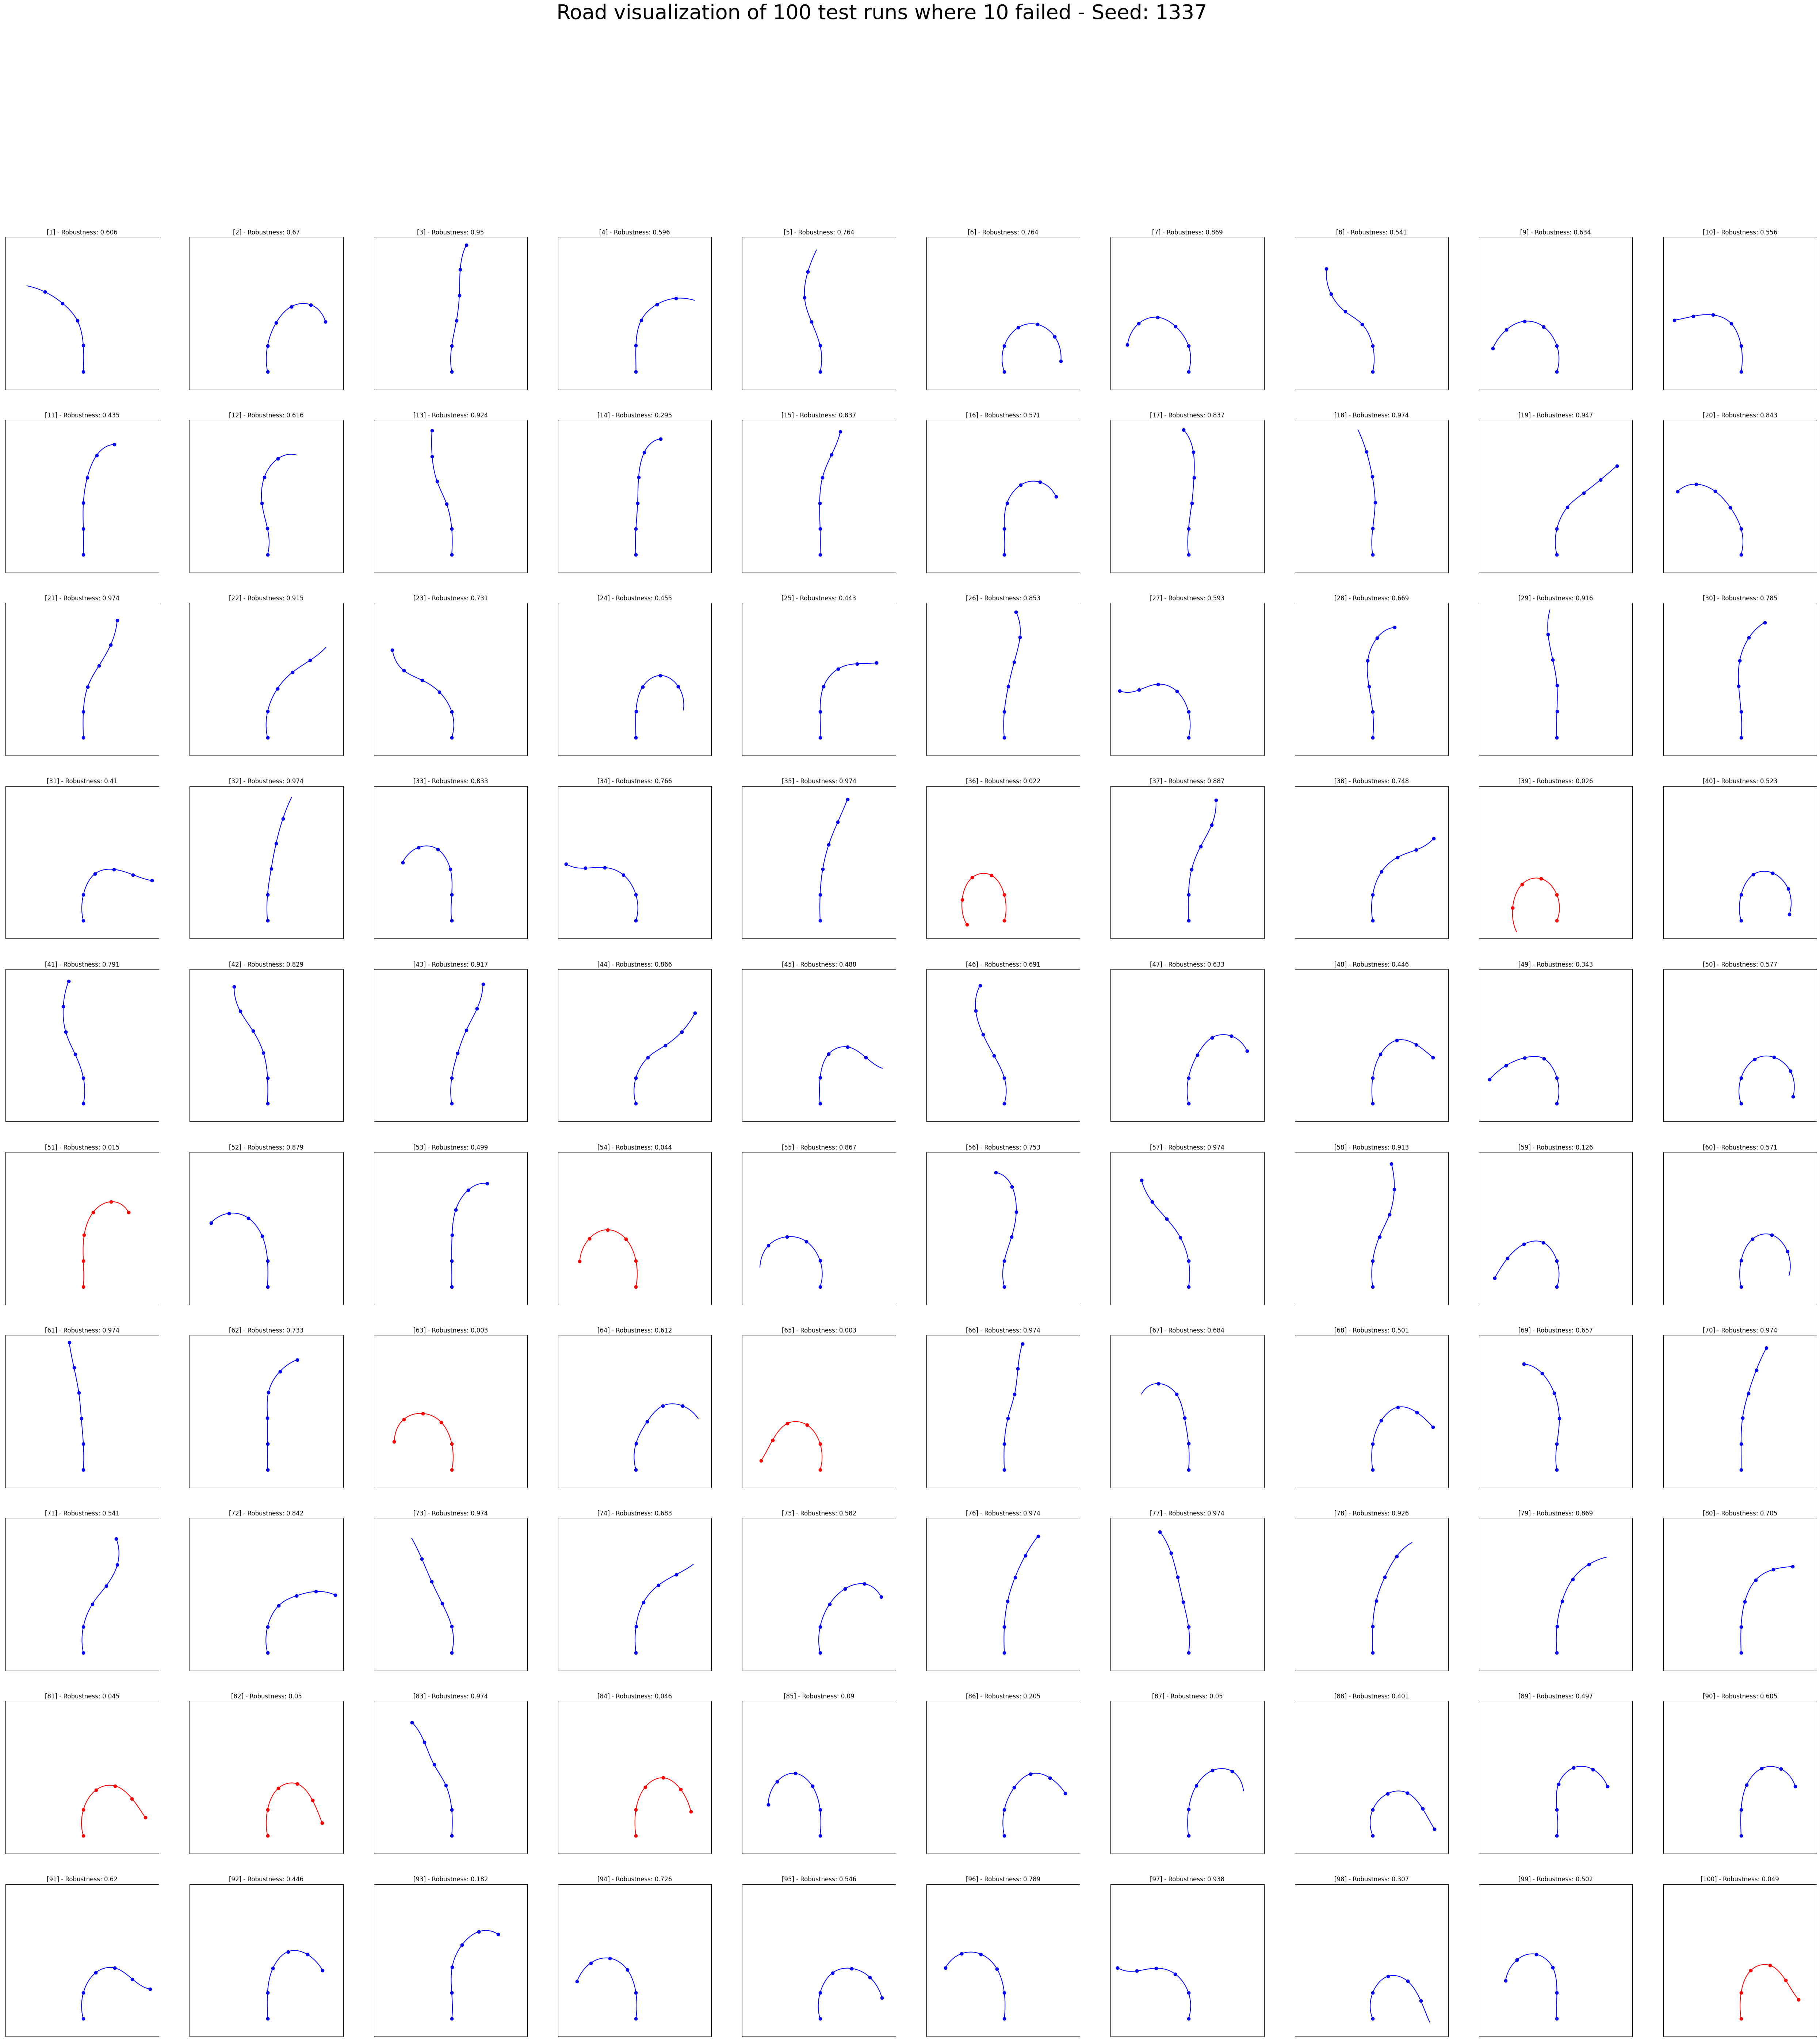

In [5]:
road_visualization(0, 100)